In [62]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

data=pd.read_csv('Breast_GSE45827.csv',delimiter=',')
data

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [63]:
X=data.drop(columns='type')

In [66]:
df3 = pd.DataFrame(X)
df3

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [74]:
pca = PCA(n_components=0.85)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_*100)

[20.41924222 10.8268398   5.86184353  3.59267208  3.47137046  2.75614384
  2.39359787  1.9367979   1.72993363  1.44361406  1.20110272  1.09341031
  0.99246241  0.9495412   0.90293675  0.84213539  0.82625424  0.79449617
  0.78157     0.72776626  0.71490982  0.70731483  0.67156071  0.6549938
  0.62283644  0.59807987  0.59561507  0.57624535  0.56753086  0.5656761
  0.55235619  0.54165596  0.52752383  0.50593274  0.49985162  0.49098958
  0.47993594  0.47469911  0.46778062  0.45961959  0.44543034  0.44429607
  0.42717581  0.4224496   0.4151314   0.41332985  0.40265457  0.3948014
  0.38903149  0.38453693  0.37410364  0.37317631  0.36573048  0.35991509
  0.35485158  0.35365181  0.34954071  0.34189275  0.33867319  0.33143856
  0.3225149   0.32170109  0.31668826  0.30816328  0.30495528  0.30017782
  0.29848793  0.29178899  0.28879699]


In [75]:
pca_components = abs(pca.components_)
print(pca_components)

[[5.87142508e-01 3.93775075e-03 7.25987909e-03 ... 4.00518685e-06
  2.24648985e-04 3.38683610e-05]
 [3.09046986e-01 1.90341946e-04 5.20429043e-03 ... 8.83842386e-04
  1.61261204e-03 5.82521392e-04]
 [1.17074343e-01 2.83181190e-03 4.63797783e-03 ... 1.77105032e-04
  2.68854142e-04 3.15275965e-04]
 ...
 [3.07608149e-02 2.78444959e-04 4.27330105e-03 ... 1.13380503e-03
  1.29446270e-04 1.20857868e-03]
 [2.35238480e-02 3.44023587e-04 2.76937365e-03 ... 3.15768198e-04
  1.68643088e-03 1.46941147e-05]
 [7.69161805e-03 3.26709607e-03 9.29785854e-04 ... 5.84417567e-04
  4.98841476e-04 1.28815565e-03]]


In [76]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
   
    temp = np.argpartition(-(pca_components[row]), 4)
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['samples', '228241_at', '205225_at', '237339_at']
Component 1: ['samples', '211430_s_at', '214677_x_at', '213975_s_at']
Component 2: ['samples', '205044_at', '202037_s_at', '202036_s_at']
Component 3: ['samples', '206378_at', '229152_at', '214451_at']
Component 4: ['samples', '203757_s_at', '211657_at', '1553602_at']
Component 5: ['205440_s_at', '208228_s_at', '203638_s_at', '205242_at']
Component 6: ['samples', '37892_at', '217428_s_at', '204320_at']
Component 7: ['samples', '202018_s_at', '240304_s_at', '225645_at']
Component 8: ['205916_at', '202917_s_at', '205157_s_at', '203535_at']
Component 9: ['samples', '218963_s_at', '1558034_s_at', '202376_at']
Component 10: ['samples', '1553602_at', '225165_at', '210930_s_at']
Component 11: ['samples', '202018_s_at', '204734_at', '213664_at']
Component 12: ['samples', '201650_at', '217388_s_at', '202291_s_at']
Component 13: ['samples', '1553434_at', '230493_at', '225987_at']
Compo

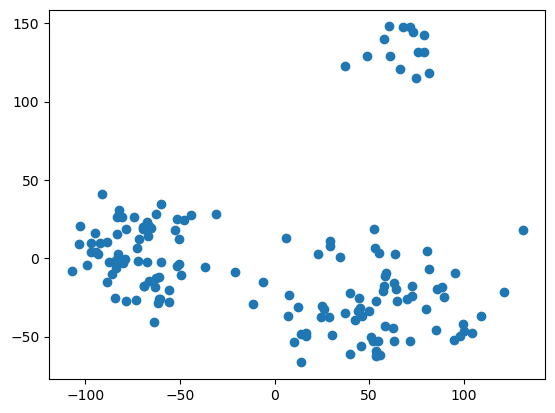

In [83]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.show()

In [84]:
df2 = pd.DataFrame(X_pca)
df2

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,121.048918,-21.745289,-6.481060,4.151527,-25.555009,14.990412,41.755291,-12.145402,-2.458069,19.435854,...,-9.367916,7.839377,19.510225,5.289623,-16.706461,-0.715306,5.365406,-1.642309,0.621889,31.451300
1,108.847869,-36.811580,6.325447,3.676388,-10.457109,40.674015,26.456552,10.433038,13.905647,34.254037,...,-17.834513,18.586999,12.084642,9.334725,2.607863,7.657673,10.982903,17.880869,12.746968,2.203428
2,131.031056,18.314098,0.288184,0.236025,-9.909911,46.934354,53.556544,-1.993880,-17.570847,23.946902,...,-1.284509,1.041173,-5.260195,-1.101604,2.134929,0.397191,3.504240,6.483734,3.428612,1.561743
3,99.917842,-46.517544,0.094111,1.278636,-34.875195,-20.576385,32.056460,-1.386125,16.555440,11.921335,...,-9.717779,-6.939957,-11.972345,-15.267223,-12.098643,6.320858,-7.649063,14.443221,0.759778,10.159561
4,99.757956,-42.122234,-6.877828,5.461414,-25.520705,2.131546,31.502130,-18.590346,11.018329,16.636291,...,15.792218,-3.732024,-1.036446,-0.243585,0.360825,-10.070005,-6.887300,-3.911636,9.638222,-1.391845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-82.168638,31.081359,-0.960167,-49.446012,26.271394,-27.560954,-3.937362,-40.183536,21.365728,39.969698,...,6.757567,-20.972631,2.269966,1.867805,-7.793760,-2.527603,13.178262,10.410123,8.785305,-2.130447
147,-62.731751,28.323443,-54.326232,-40.761193,6.026281,8.813971,1.770854,-23.226070,-16.841634,17.057631,...,-6.928198,-13.747528,11.254309,15.830565,-10.772595,-3.195433,-5.804954,21.129860,-13.326016,5.851360
148,-59.968347,34.548955,-29.751854,-37.367155,-8.111893,-14.280106,0.377545,-8.213609,-16.426417,36.189536,...,-10.386375,7.627183,-17.244179,7.612015,-13.292837,-6.425279,7.498634,17.247171,-12.631001,-12.712276
149,-83.238473,15.256078,-22.822580,-1.490373,-18.901046,-11.707086,-9.387367,11.190252,-29.897112,14.772201,...,1.890655,0.800800,2.988058,-4.586982,-9.493148,2.632261,7.047673,0.020723,2.644203,0.393699
